# Define the VGG16 class exactly as the normal VGG16 model

In [1]:
import torch
import torch.nn as nn

# Custom VGG-like Model
class CustomVGG(nn.Module):
    def __init__(self, num_classes=10):
        super(CustomVGG, self).__init__()
        
        # Feature Extractor
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        # Classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

## Train and Validate custom VGG model

Using device: cuda
Epoch 1/100, Train Loss: 2.3076, Val Loss: 2.3048, Val Accuracy: 0.0874
Best model saved at epoch 1 with validation loss: 2.3048
Epoch 2/100, Train Loss: 2.3031, Val Loss: 2.3024, Val Accuracy: 0.1055
Best model saved at epoch 2 with validation loss: 2.3024
Epoch 3/100, Train Loss: 2.3036, Val Loss: 2.3034, Val Accuracy: 0.0874
Epoch 4/100, Train Loss: 2.3033, Val Loss: 2.3025, Val Accuracy: 0.1068
Epoch 5/100, Train Loss: 2.3031, Val Loss: 2.3019, Val Accuracy: 0.1046
Best model saved at epoch 5 with validation loss: 2.3019
Epoch 6/100, Train Loss: 2.3028, Val Loss: 2.3041, Val Accuracy: 0.1046
Epoch 7/100, Train Loss: 2.3032, Val Loss: 2.3023, Val Accuracy: 0.0957
Epoch 8/100, Train Loss: 2.3031, Val Loss: 2.3035, Val Accuracy: 0.0874
Epoch 9/100, Train Loss: 2.3029, Val Loss: 2.3020, Val Accuracy: 0.1030
Epoch 10/100, Train Loss: 2.3029, Val Loss: 2.3021, Val Accuracy: 0.1079
Epoch 11/100, Train Loss: 2.3028, Val Loss: 2.3024, Val Accuracy: 0.1068
Epoch 12/100, Tr

C:\Users\blake\AppData\Local\Temp\ipykernel_24724\1739006446.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


Best model loaded for final evaluation.


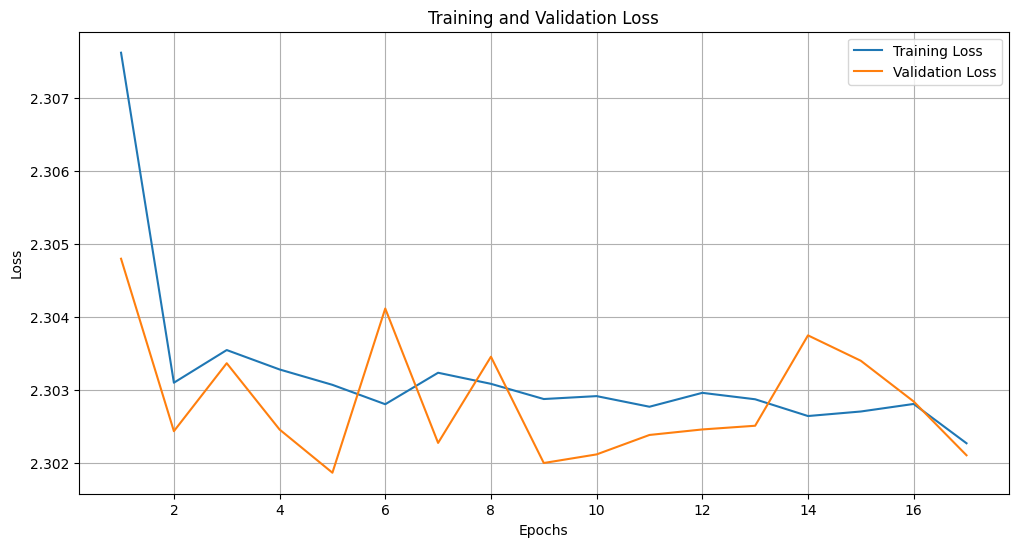

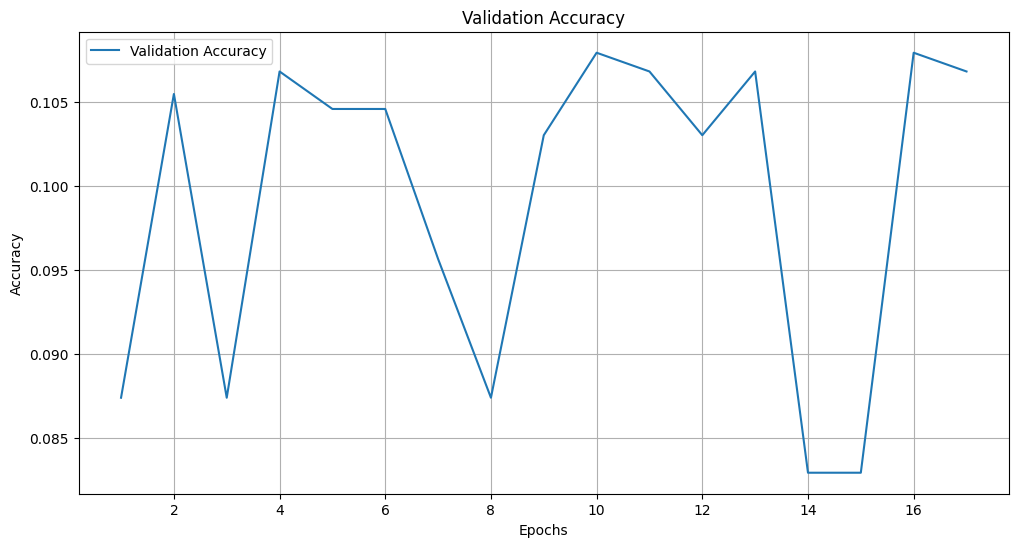


Confusion Matrix:
 [[479   0   0   0   0   0   0   0   0   0]
 [469   0   0   0   0   0   0   0   0   0]
 [462   0   0   0   0   0   0   0   0   0]
 [473   0   0   0   0   0   0   0   0   0]
 [477   0   0   0   0   0   0   0   0   0]
 [448   0   0   0   0   0   0   0   0   0]
 [484   0   0   0   0   0   0   0   0   0]
 [392   0   0   0   0   0   0   0   0   0]
 [372   0   0   0   0   0   0   0   0   0]
 [429   0   0   0   0   0   0   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

          c0       0.11      1.00      0.19       479
          c1       0.00      0.00      0.00       469
          c2       0.00      0.00      0.00       462
          c3       0.00      0.00      0.00       473
          c4       0.00      0.00      0.00       477
          c5       0.00      0.00      0.00       448
          c6       0.00      0.00      0.00       484
          c7       0.00      0.00      0.00       392
          c8       0.00      0.00    

c:\Users\blake\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\blake\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\blake\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, WeightedRandomSampler, random_split
from torchvision import datasets, transforms
from torch.cuda.amp import autocast, GradScaler
from PIL import Image
import os
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import random
import numpy as np

# Set Random Seed for Reproducibility
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Dataset Paths- Update with your paths
train_dir = r'C:\Users\blake\OneDrive\Desktop\MCS\Artifical Neural Networks\distracted-driving-behaviors\state-farm-distracted-driver-detection\imgs\train'

# Hyperparameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 64
EPOCHS = 100
LEARNING_RATE = 5e-3
NUM_CLASSES = 10
PATIENCE = 12  # Early stopping patience

# Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data Augmentation
transform_train = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.RandomRotation(10),  # Small rotation to preserve directionality
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Adjust brightness/contrast
    transforms.RandomResizedCrop(IMG_HEIGHT, scale=(0.8, 1.2)),  # Random cropping and resizing
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet normalization
])

transform_val_test = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load Training Data
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform_train)

# Split Training Dataset into Training and Validation Sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, validation_set = random_split(train_dataset, [train_size, val_size])

# Weighted Sampling for Training
train_labels = [train_dataset.targets[i] for i in train_subset.indices]
class_counts = Counter(train_labels)
sample_weights = [1.0 / class_counts[label] for label in train_labels]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# DataLoaders
train_loader = DataLoader(train_subset, batch_size=BATCH_SIZE, sampler=sampler, num_workers=4, pin_memory=True)
val_loader = DataLoader(validation_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)

# Initialize Model
model = CustomVGG(NUM_CLASSES).to(device)

# Loss, Optimizer, Scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.3, patience=5)

# Mixed Precision Training
scaler = torch.amp.GradScaler()

# Early Stopping Variables
best_val_loss = float('inf')
counter = 0
best_model_path = "custom_vgg_best_model.pth"

# Training Loop with Early Stopping
train_losses, val_losses, val_accuracies = [], [], []
for epoch in range(EPOCHS):
    model.train()
    train_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        with torch.amp.autocast(device_type="cuda"):  # Proper autocast usage
            outputs = model(images)
            loss = criterion(outputs, labels)
        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation Phase
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            with torch.amp.autocast(device_type="cuda"):  # Proper autocast usage
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                total += labels.size(0)

    val_loss /= len(val_loader)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    # Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), best_model_path)
        print(f"Best model saved at epoch {epoch+1} with validation loss: {val_loss:.4f}")
    else:
        counter += 1
        if counter >= PATIENCE:
            print(f"Early stopping at epoch {epoch+1}. Best validation loss: {best_val_loss:.4f}")
            break

    scheduler.step(val_loss)

# Load the Best Model
model.load_state_dict(torch.load(best_model_path))
print("Best model loaded for final evaluation.")

# Final Plots and Metrics
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

cm = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(all_labels, all_preds, target_names=train_dataset.classes))

## Display some images and the models guess

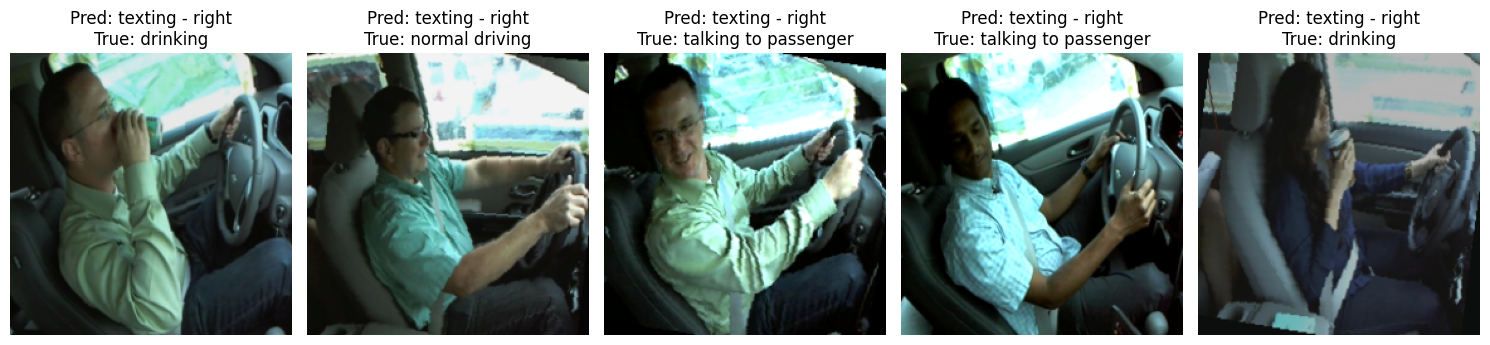

In [3]:
import random
import matplotlib.pyplot as plt
import torch

# Class names with full descriptions
class_names = [
    "normal driving",
    "texting - right",
    "talking on the phone - right",
    "texting - left",
    "talking on the phone - left",
    "operating the radio",
    "drinking",
    "reaching behind",
    "hair and makeup",
    "talking to passenger",
]


# Function to visualize predictions
def visualize_predictions(model, data_loader, device, class_names, num_images=5):
    model.eval()  # Set model to evaluation mode
    images_shown = 0

    # Create a figure
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    axs = axs.flatten()

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for idx in range(images.size(0)):
                if images_shown >= num_images:
                    break
                
                # Move image to CPU for plotting
                img = images[idx].cpu().numpy().transpose((1, 2, 0))
                img = img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # Denormalize
                img = img.clip(0, 1)

                # Plot image and predictions
                axs[images_shown].imshow(img)
                axs[images_shown].axis('off')
                axs[images_shown].set_title(f"Pred: {class_names[preds[idx]]}\nTrue: {class_names[labels[idx]]}")
                images_shown += 1

            if images_shown >= num_images:
                break

    plt.tight_layout()
    plt.show()

# Visualize 5 random predictions
visualize_predictions(model, val_loader, device, class_names, num_images=5)


## Create the submission file on the test dataset

In [ ]:
import os
import csv
import torch
from torchvision import transforms
from PIL import Image
from tqdm import tqdm
import torch.nn as nn
import logging

# Configure Logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Dataset Paths- Update with your paths
test_dir = r'C:\Users\blake\OneDrive\Desktop\MCS\Artifical Neural Networks\distracted-driving-behaviors\state-farm-distracted-driver-detection\imgs\test'
best_model_path = "custom_vgg_best_model.pth"
submission_file = "custom_vgg_submission.csv"

# Hyperparameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 64
NUM_CLASSES = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
logging.info(f"Using device: {device}")

# Transformations
transform_val_test = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet normalization
])


# Function to Process a Batch of Images
def process_batch(image_paths):
    images = []
    img_names = []
    for img_path in image_paths:
        img_name = os.path.basename(img_path)
        img = Image.open(img_path).convert("RGB")
        img = transform_val_test(img)
        images.append(img)
        img_names.append(img_name)

    images = torch.stack(images).to(device)
    return images, img_names

# Load Test Data
logging.info("Reading test images...")
test_image_paths = [os.path.join(test_dir, img) for img in os.listdir(test_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
if len(test_image_paths) == 0:
    raise ValueError("No valid image files found in the test directory!")
logging.info(f"Found {len(test_image_paths)} test images.")

# Load the Best Model
logging.info("Loading the best model...")
best_model = CustomVGG(NUM_CLASSES).to(device)
best_model.load_state_dict(torch.load(best_model_path, map_location=device))
best_model.eval()
logging.info("Model loaded successfully.")

# Generate Predictions
logging.info("Generating predictions...")
fieldnames = ["img"] + [f"c{i}" for i in range(NUM_CLASSES)]

with open(submission_file, mode="w", newline="") as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()

    for i in tqdm(range(0, len(test_image_paths), BATCH_SIZE), desc="Processing Batches", unit="batch"):
        batch_paths = test_image_paths[i:i + BATCH_SIZE]
        images, img_names = process_batch(batch_paths)

        with torch.no_grad():
            outputs = best_model(images)
            probabilities = torch.softmax(outputs, dim=1).cpu().numpy()

        for j, img_name in enumerate(img_names):
            row = {"img": img_name}
            row.update({f"c{k}": probabilities[j][k] for k in range(NUM_CLASSES)})
            writer.writerow(row)

logging.info(f"Submission file '{submission_file}' created successfully.")

2024-12-03 23:09:48,822 - INFO - Using device: cuda
2024-12-03 23:09:48,823 - INFO - Reading test images...
2024-12-03 23:09:49,130 - INFO - Found 79726 test images.
2024-12-03 23:09:49,131 - INFO - Loading the best model...
C:\Users\blake\AppData\Local\Temp\ipykernel_24724\1202355530.py:58: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_on